## Heart Disease - Summary

The objective was to predict heart disease based on patient data from Cleaveland database. The dataset obtained from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci) consisted of 303 samples with 14 attributes (13 features, 1 label).<br>
The dataset was fairly balanced between the two target labels (0: healthy, and 1: heart disease), with 54% of the data labeled disease. 

Exploratory analysis revealed the features most correlated to disease state were cp, thalach, and slope, while ca, exang, oldpeak, and thal were the most anti-correlated. 
It was also noted that slope and oldpeak were anti-correlated, and may be somewhat redundant as slope is a categorization of oldpeak.

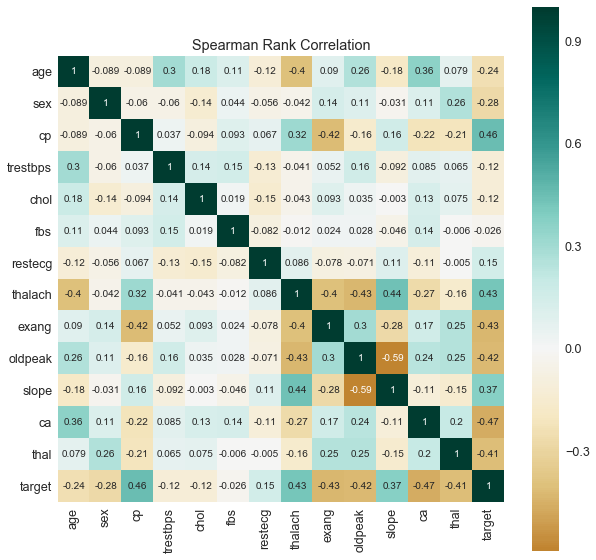

In [40]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(method='spearman'), square = True, cmap = 'BrBG', annot=True,
                 center=0, annot_kws={'size':10})
plt.title('Spearman Rank Correlation');

Three machine learning models were trained to predict heart disease from patient data:
1. K-Nearest Neighbors
1. LinearSVC
1. Random Forest Classifier
<br>

Model performance was evaluated by several metrics, including accuracy, precision, recall, and f1-score in attempt to minimize both false positives and false negatives as much as possible. 

In [62]:
print('K-Neighbors')
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
# LinearSVC
print('LinearSVC')
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, c_pred)))
# Random Forest
print('Random Forest')
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, ro_pred)))

K-Neighbors
Accuracy: 0.824
LinearSVC
Accuracy: 0.868
Random Forest
Accuracy: 0.857


Feature importance for the random forest classifier shows which features were the most informative for predicting disease.

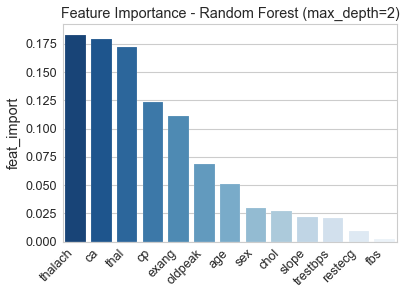

In [63]:
# Most important features for random forest with reduced max_depth
# Need to refit the classifier with the 'best parameters' identified from grid search in order to access feature importances
r = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=random_seed).fit(X_train, y_train)
feat_opt = pd.DataFrame(r.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False).rename(
    columns={0:'feat_import'})
sns.barplot(x=feat_opt.index, y=feat_opt['feat_import'], palette='Blues_r')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance - Random Forest (max_depth=2)');

The most important features for random forest were: thalach, ca, and thal, followed by cp and exang. These were among the most positively/negatively-correlated features identified earlier. Interestingly, although slope was the third most correlated feature with 'target', it is among the least important for random forest. Slope, which categorizes oldpeak, does appear to be mostly redundant. 

thalach - maximum heart rate achieved
ca - number of major vessles colored by flouroscopy
thal - thallium-201 stress scintigraphy (defect category)
cp - chest pain type
exang - exercise-induced angina